### Histograms of the Graph Metrics for all Clusters in 250 iterations

In [15]:
%matplotlib inline

import os
import pickle
import matplotlib.pyplot as plt

In [16]:
# DNp01 (giant fiber) to DNp11
body_ids = ["2307027729","5813024015", "1565846637", "1405231475", "1466998977", "5813023322", "1100404581", "1226887763", "1228264951", "512851433", "5813026936", "1281324958"]
DNp_ids = [int(i) for i in body_ids]

In [17]:
metricName = 'betweenCentrality'

In [18]:
# make sub-directories in figures/ for each metricName
if not os.path.exists('./figures/' + metricName):
    os.makedirs('./figures/' + metricName)

In [19]:
with open(f'./data/{metricName}.pkl', 'rb') as handle:
    graphMetric = pickle.load(handle)

5813026936 0.038345667358809496
1565846637 0.0069953969756339045
1100404581 0.01890251361467782
512851433 0.03581597986746249
1226887763 0.00835448331095972
5813023322 0.05331654004625181
1228264951 0.019539798224090875
1466998977 0.00472780901146659
1405231475 0.01518922250696726
2307027729 0.03697742643007245
5813024015 0.04657175604463285
1281324958 0.059304802041059784


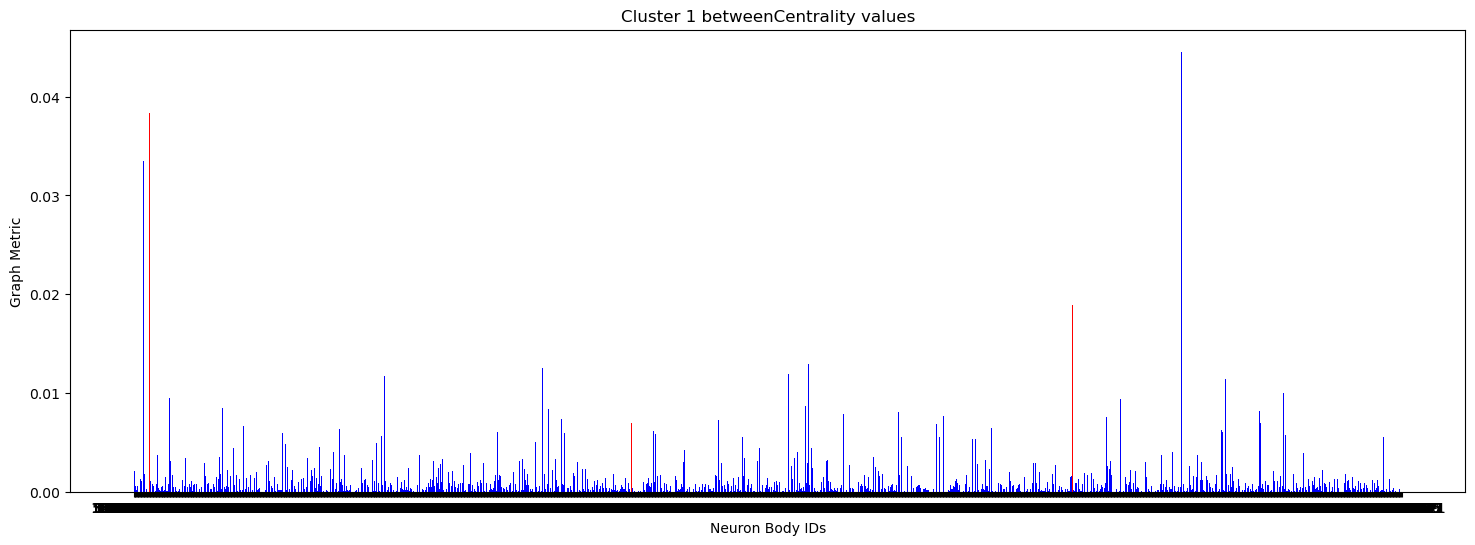

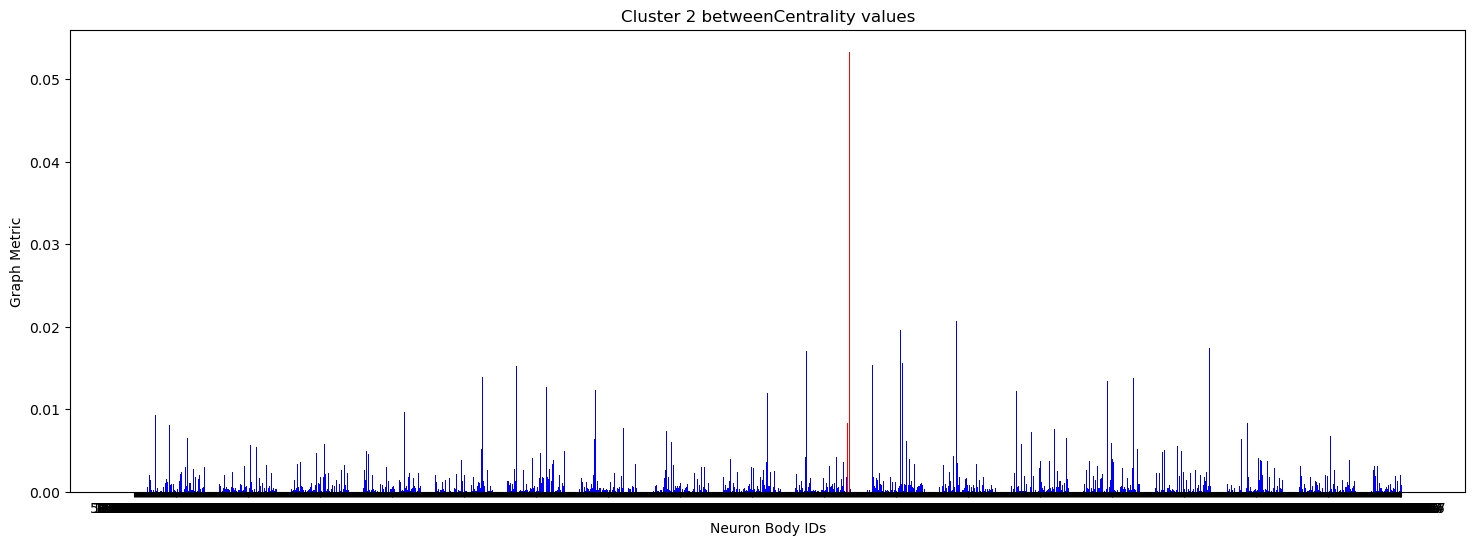

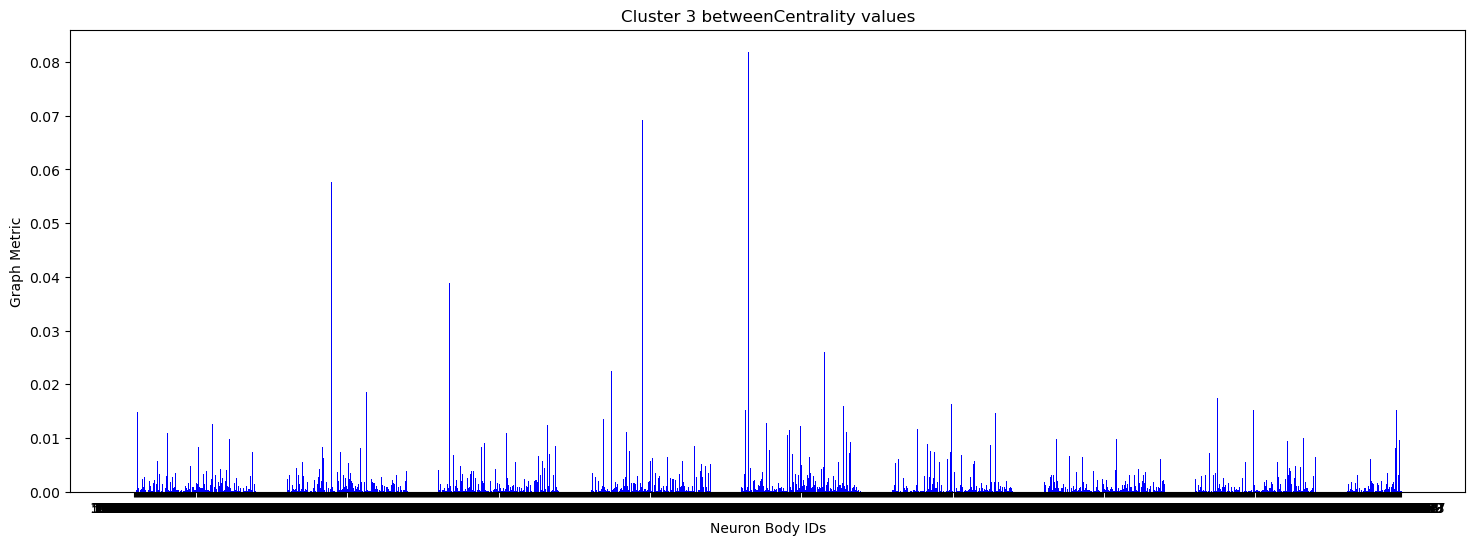

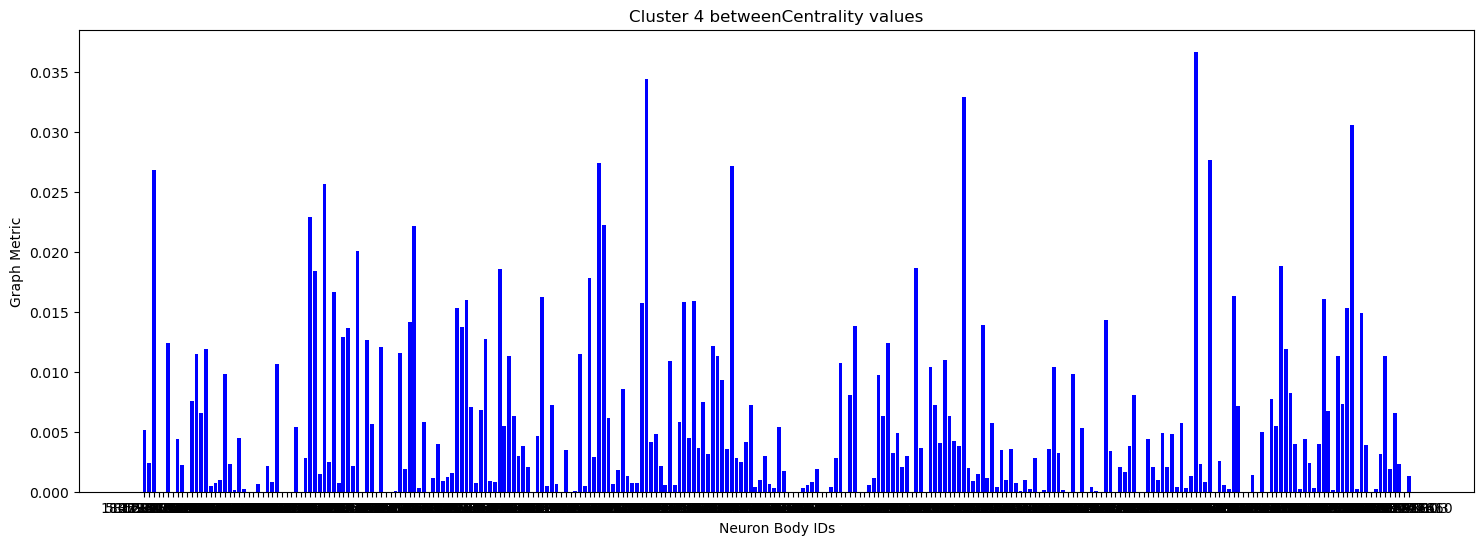

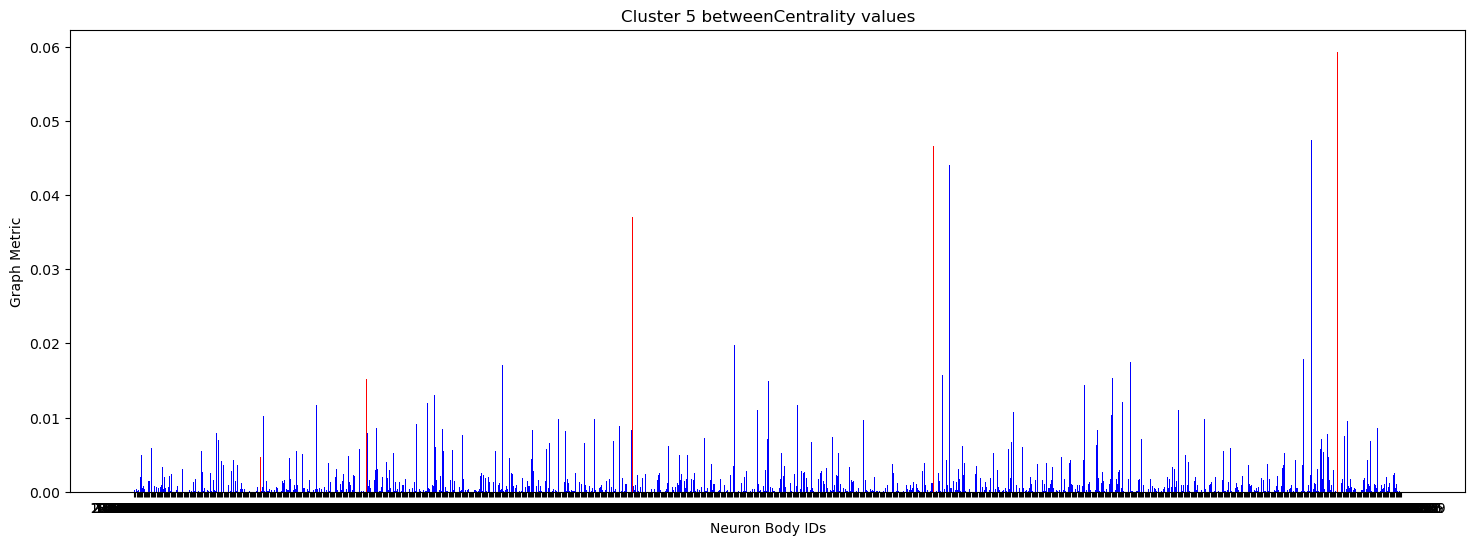

In [61]:
iter250 = graphMetric[250]

for i in range(len(iter250)):
    plt.figure(figsize=(18, 6))
    subject_ids, graphMetric_values = list(iter250[i].keys()), list(iter250[i].values())

    # Convert subject_ids to strings
    subject_ids = [str(id) for id in subject_ids]

    # Plot each bar individually, checking if it should be highlighted
    for id, value in zip(subject_ids, graphMetric_values):
        if id in body_ids:
            print(id, value)
            plt.bar(id, value, color='red')  # color the highlight bars red
        else:
            plt.bar(id, value, color='blue')

    plt.title(f'Cluster {i+1} {metricName} values')
    plt.xlabel('Neuron Body IDs')
    plt.ylabel('Graph Metric')
    plt.savefig(f'./figures/{metricName}/cluster{i+1}.png')
    # plt.show()

5813026936 38.34566735880949
1565846637 6.995396975633905
1100404581 18.90251361467782
512851433 35.81597986746249
1226887763 8.354483310959719
5813023322 53.31654004625181
1228264951 19.539798224090873
1466998977 4.72780901146659
1405231475 15.18922250696726
2307027729 36.97742643007245
5813024015 46.57175604463285
1281324958 59.30480204105979


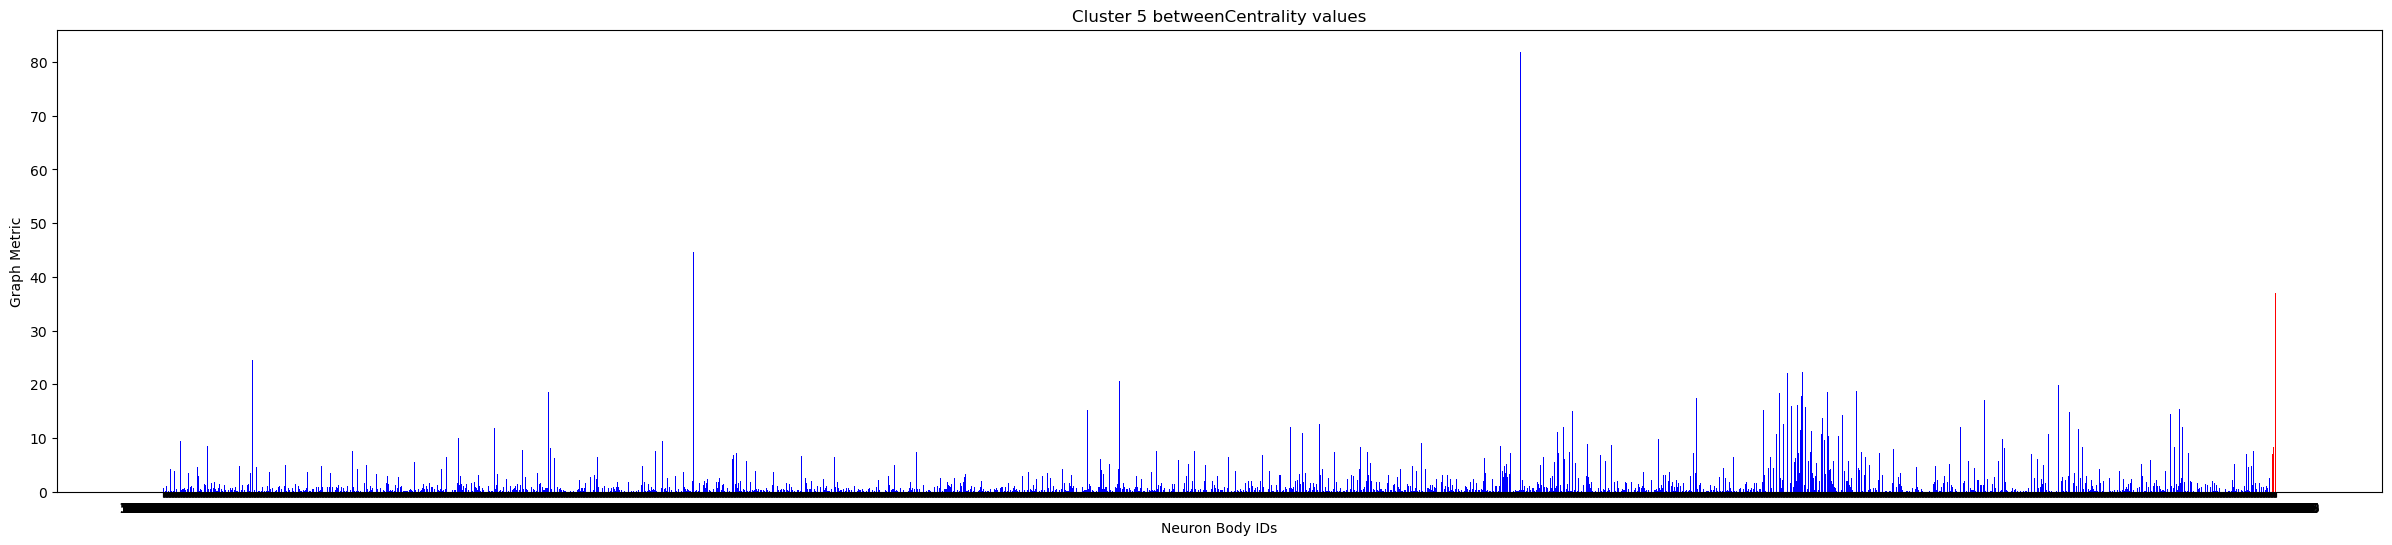

In [60]:
# plot all clusters in one figure

iter250 = graphMetric[250]
subject_ids, graphMetric_values = [], []
for i in range(len(iter250)):
    subject_ids.extend(list(iter250[i].keys()))
    graphMetric_values.extend(list(iter250[i].values()))

# scale graphMetric_values by 1000
# graphMetric_values = [i*1000 for i in graphMetric_values]

# Convert subject_ids to strings
subject_ids = [str(id) for id in subject_ids]

plt.figure(figsize=(30, 6))

# Plot each bar individually, checking if it should be highlighted
for id, value in zip(subject_ids, graphMetric_values):
    if id not in body_ids:
        plt.bar(id, value, color='blue')

for id, value in zip(subject_ids, graphMetric_values):
    if id in body_ids:
        print(id, value)
        plt.bar(id, value, color='red')  # color the highlight bars red

plt.title(f'Cluster {i+1} {metricName} values')
plt.xlabel('Neuron Body IDs')
plt.ylabel('Graph Metric')
# plt.savefig(f'./figures/{metricName}/cluster{i+1}.png')
plt.show()

In [59]:
min(graphMetric_values), max(graphMetric_values), sum(graphMetric_values)/len(graphMetric_values)

(0.0, 81.92805030306941, 1.4987440372324607)